In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Load your data from CSV text
data = pd.read_csv('../DATA2/merged.csv')

# Split data into features and target
X = data.drop('hourly_kwh', axis=1)
y = data['hourly_kwh']

# Convert 'FID' to datetime and extract useful features
X['FID'] = pd.to_datetime(X['FID'])
X['hour'] = X['FID'].dt.hour
X['month'] = X['FID'].dt.month
X['day'] = X['FID'].dt.day
X.drop('FID', axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = mae
    print(f'{name} MAE: {mae}')

# Find the best model
best_model = min(results, key=results.get)
print(f'Best performing model: {best_model} with MAE: {results[best_model]}')


Linear Regression MAE: 0.22755506051044447
Random Forest MAE: 0.051383367835189056
Gradient Boosting MAE: 0.09529050945869526
Best performing model: Random Forest with MAE: 0.051383367835189056


In [104]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the training data
data = pd.read_csv('../DATA2/merged.csv')

# Prepare features and target variables
X = data.drop('hourly_kwh', axis=1)
y = data['hourly_kwh']

# Preprocess 'FID' to datetime and extract relevant features
X['FID'] = pd.to_datetime(X['FID'])
X['hour'] = X['FID'].dt.hour
X['month'] = X['FID'].dt.month
X['day'] = X['FID'].dt.day
X.drop('FID', axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor with the optimized parameters
rf_model = RandomForestRegressor(max_depth=20, min_samples_split=2, n_estimators=50, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Save the model
joblib.dump(rf_model, '../DATA2/optimized_random_forest_model.pkl')

print("Optimized model training complete and saved.")


Mean Absolute Error: 0.05184444711692965
Optimized model training complete and saved.


In [105]:
# Load the trained model
rf_model = joblib.load('../DATA2/optimized_random_forest_model.pkl')

# Get the feature names used for training
feature_names = list(X_train.columns)

print(feature_names)

['temp', 'pressure', 'cloudiness', 'humidity_relative', 'distanceToWareMiddag', 'hasSunLight', 'hour', 'month', 'day']


In [106]:
# Load the forecast data
forecast = pd.read_csv('../DATA2/forecast.csv')
forecast['timestamp'] = pd.to_datetime(forecast['timestamp'])
forecast['hour'] = forecast['timestamp'].dt.hour
forecast['month'] = forecast['timestamp'].dt.month
forecast['day'] = forecast['timestamp'].dt.day

# Prepare the features for prediction
features_forecast = forecast[['temp', 'pressure', 'cloudiness', 'humidity_relative', 'distanceToWareMiddag', 'hasSunLight', 'hour', 'month', 'day']]

# Load the optimized model
rf_model = joblib.load('../DATA2/optimized_random_forest_model.pkl')


# Make predictions
forecast['predicted_hourly_kwh'] = rf_model.predict(features_forecast)

# Display the first few prediction results
print(forecast[['timestamp', 'predicted_hourly_kwh']].head())

# Optionally, save the predictions to a CSV for further analysis or use
forecast.to_csv('../DATA2/forecast_predictions.csv', index=False)

# drop the columns that are not needed
forecast.drop(['temp', 'pressure', 'cloudiness', 'humidity_relative', 'distanceToWareMiddag', 'hasSunLight', 'hour', 'month', 'day'], axis=1, inplace=True)

# Save the predictions to a CSV file
forecast.to_csv('../DATA2/RESULTS.csv', index=False)


            timestamp  predicted_hourly_kwh
0 2024-04-19 11:00:00              0.253354
1 2024-04-19 12:00:00              0.245944
2 2024-04-19 13:00:00              0.253580
3 2024-04-19 14:00:00              0.256731
4 2024-04-19 15:00:00              0.324797


In [107]:
"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model with potential new parameters
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV to find better parameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10, 20]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)

# Check new MAE
new_mae = mean_absolute_error(y_test, predictions)
print(f'New Mean Absolute Error: {new_mae}')
"""


'\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the model with potential new parameters\nrf = RandomForestRegressor(random_state=42)\n\n# Set up GridSearchCV to find better parameters\nparam_grid = {\n    \'n_estimators\': [50, 100, 150],\n    \'max_depth\': [10, 20, None],\n    \'min_samples_split\': [2, 10, 20]\n}\n\ngrid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring=\'neg_mean_absolute_error\', verbose=2)\ngrid_search.fit(X_train, y_train)\n\n# Print best parameters\nprint("Best parameters:", grid_search.best_params_)\n\n# Use the best estimator to make predictions\nbest_rf = grid_search.best_estimator_\npredictions = best_rf.predict(X_test)\n\n# Check new MAE\nnew_mae = mean_absolute_error(y_test, predictions)\nprint(f\'New Mean Absolute Error: {new_mae}\')\n'

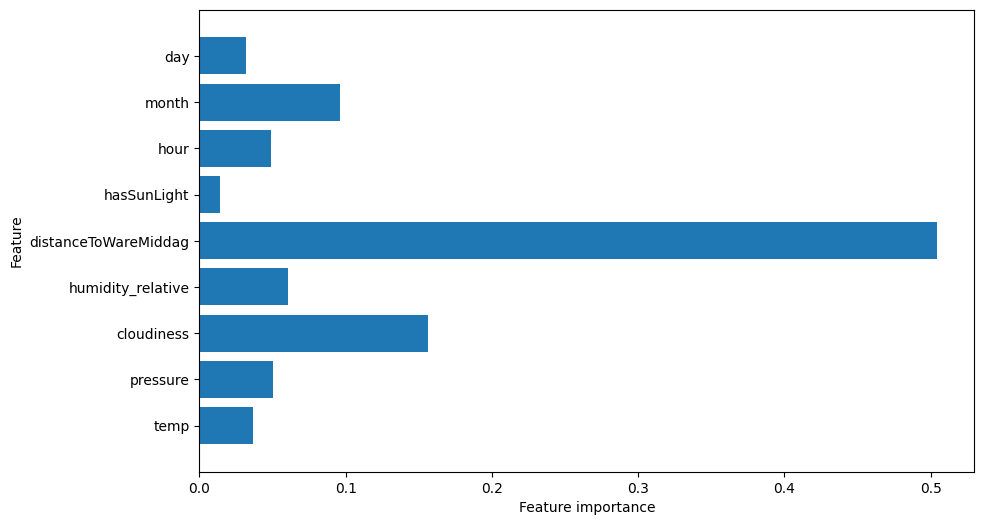

Index(['temp', 'pressure', 'cloudiness', 'humidity_relative',
       'distanceToWareMiddag', 'hasSunLight', 'hour', 'month', 'day'],
      dtype='object')
[0.0368389  0.05004407 0.1564446  0.06091069 0.50470509 0.01422622
 0.04922494 0.09584149 0.031764  ]
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting feature importance for a tree-based model
def plot_feature_importance(model, features):
    plt.figure(figsize=(10, 6))
    n_features = len(features)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# Assuming 'rf_model' is your trained RandomForest model
plot_feature_importance(rf_model, X_train.columns)
plt.show()
print(X_train.columns)
print(rf_model.feature_importances_)
print(rf_model.get_params())

